## WILDFIRE DETECTION USING CONVOLUTIONAL NEURAL NETWORK AND VGG16 

### IMPORTING LIBRAIERS


In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Dropout

import keras as keras



In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [7]:
!pip install tqdm


  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


### CLEAING OUR IMAGES DATA FOR TRANING SET

In [8]:
import os
from PIL import Image
from tqdm import tqdm
train_df='/Users/mehakpreetsingh/Documents/DATA   SCIENCE/DATA SCIENCE PROJECT/Wildfire Dectection CNN/forest_fire/Training'
for root,_,files in os.walk(train_df):
    for i in tqdm(files,desc='processing images'):
        file_path_training=os.path.join(root,i)
        try:
            img=Image.open(file_path_training)
            img.verify()
        except Exception as e:
               os.remove(file_path_training)
   
        
    
    


processing images: 0it [00:00, ?it/s]
processing images: 100%|██████████| 904/904 [00:00<00:00, 5939.60it/s]


#### USING IMAGE GENERATOR TRANSFORM OUR DATASET INTO TRANING SET

In [9]:
train_df_gen=ImageDataGenerator(rescale=1./255,zoom_range=0.0,horizontal_flip=True)
train_data_set=train_df_gen.flow_from_directory(train_df,batch_size=32,class_mode='binary',target_size=(64,64))

Found 1832 images belonging to 2 classes.


### CLEAING OUR IMAGES DATA FOR TESTING  SET

In [10]:
import os
from PIL import Image
from tqdm import tqdm
test_df='/Users/mehakpreetsingh/Documents/DATA   SCIENCE/DATA SCIENCE PROJECT/Wildfire Dectection CNN/forest_fire/Testing'
for root,_,files in os.walk(test_df):
    for i in tqdm(files,desc='processing images'):
        file_path_testing=os.path.join(root,i)
        try:
            img=Image.open(file_path_testing)
            img.verify()
        except Exception as e:
            
            os.remove(file_path_testing)
        
        
   
        
    
    


processing images: 0it [00:00, ?it/s]
processing images: 100%|██████████| 46/46 [00:00<00:00, 4485.26it/s]


#### USING IMAGE GENERATOR TRANSFORM OUR DATASET INTO TRANING SET

In [11]:
test_df_gen=ImageDataGenerator(rescale=1./255)
test_data_set=test_df_gen.flow_from_directory(test_df,batch_size=32,class_mode='binary',target_size=(64,64))

Found 68 images belonging to 2 classes.


##### VISULIZATION OF OUR TRAINING DATA

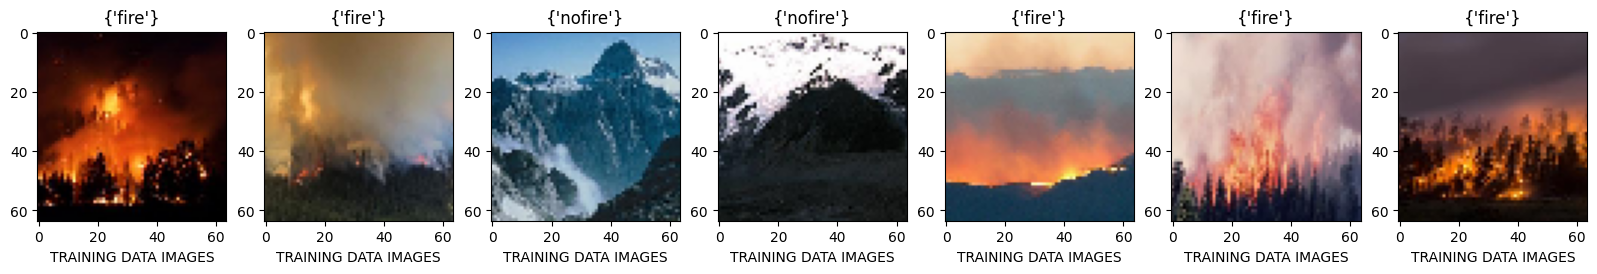

In [12]:
num=7
images, lables=next(train_data_set)



plt.figure(figsize=(20,6))
for i in range(num):
    
    plt.subplot(2,num,i+1)
    plt.imshow(images[i])
    plt.xlabel('TRAINING DATA IMAGES')
    
    

print(next(train_data_set))



##### VISULIZATION OF OUR TESITNG DATA

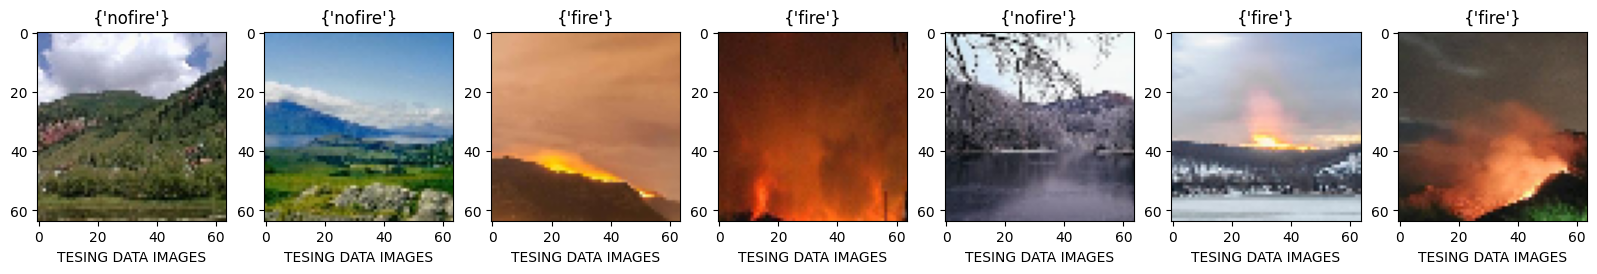

In [13]:
num=7

images, lables=next(test_data_set)

class_test=test_data_set.class_indices
index_test={v: k for k , v in class_test.items()}

plt.figure(figsize=(20,6))

for i in range(num):
    plt.subplot(2,num,i+1)
    plt.imshow(images[i])
    plt.title({index_test[lables[i]]})
    plt.xlabel('TESING DATA IMAGES')

### Making convolutional neural network 

In [14]:
CNN=tf.keras.models.Sequential()

##### Adding First convolutional neural network Layer

In [15]:
CNN.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,input_shape=[64,64,3],activation='relu'))
BatchNormalization()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<BatchNormalization name=batch_normalization, built=False>

#### Adding First Pooling Layer

In [16]:
CNN.add(tf.keras.layers.MaxPool2D(pool_size=3,strides=2))

#### Adding Second Convonutional Layer

#### Adding Second Pooling Layer


In [17]:
CNN.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu'))
BatchNormalization()
CNN.add(tf.keras.layers.MaxPool2D(pool_size=3,strides=2))



#### Adding Flatten Layer


In [18]:
CNN.add(tf.keras.layers.Flatten())


### Now Using ANN logic adding  Hidden layers 

In [19]:
CNN.add(tf.keras.layers.Dense(units=128,activation='relu'))
CNN.add(tf.keras.layers.Dense(units=128,activation='relu'))
CNN.add(tf.keras.layers.Dense(units=128,activation='relu'))
CNN.add(tf.keras.layers.Dense(units=128,activation='relu'))
Dropout(0.4)

<Dropout name=dropout, built=True>

### Now Using ANN logic adding output layer 

In [20]:
CNN.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

### Compling our CNN Model use Binary_crossentropy for binary classification 

In [21]:
CNN.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#### Fit our model on trained data and validation over Test data 

In [22]:
history=CNN.fit(x=train_data_set,validation_data=test_data_set,batch_size=32,epochs=20)

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7834 - loss: 0.4171 - val_accuracy: 0.8824 - val_loss: 0.3011
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9173 - loss: 0.2035 - val_accuracy: 0.9118 - val_loss: 0.2214
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9540 - loss: 0.1383 - val_accuracy: 0.9265 - val_loss: 0.2210
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9635 - loss: 0.1257 - val_accuracy: 0.9118 - val_loss: 0.2272
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9539 - loss: 0.1369 - val_accuracy: 0.7353 - val_loss: 0.5991
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9178 - loss: 0.2264 - val_accuracy: 0.9265 - val_loss: 0.2090
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9666 - loss: 0.0894 - val_accuracy: 0.8971 - val_loss: 0.2198
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9642 - loss: 0.1047 - val_accuracy: 0.9412 - val_loss: 0.

#### Accuracy of our CNN model 

In [23]:
loss , Accuracy_cnn=CNN.evaluate(test_data_set)
print(F'The Accuracy of VGG16 MODEL IS {Accuracy_cnn*100:.2f}%')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9506 - loss: 0.1509
The Accuracy of VGG16 MODEL IS 95.59%


### Visulazation of our Model Loss vs epochs

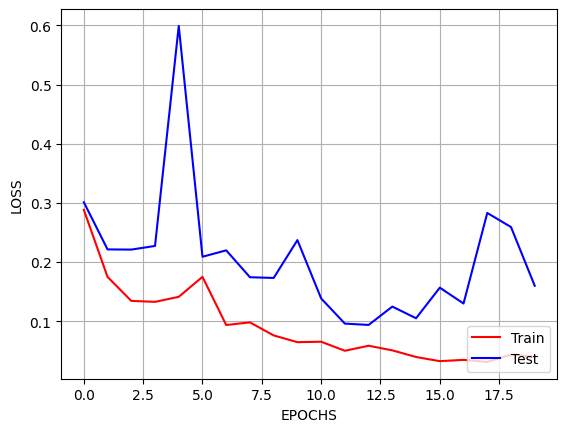

In [24]:
plt.plot(history.history['loss'],label='Train',color='red')
plt.plot(history.history['val_loss'],label='Test',color='blue')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend(loc='lower right')
plt.grid(True)

### Visulazation of our Model Accuracy vs epochs

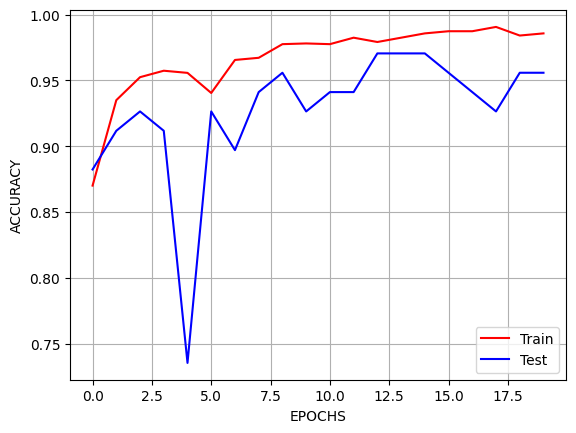

In [25]:
plt.plot(history.history['accuracy'],label='Train',color='red')
plt.plot(history.history['val_accuracy'],label='Test',color='blue')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.legend(loc='lower right')
plt.grid(True)

#### Now Taking 1st Prediction from our CNN model 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
THE PREDICTION OF INPUT IMAGE IS 1.078746425520194e-08


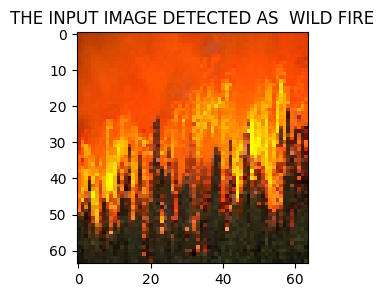

In [59]:
from tensorflow.keras.preprocessing import image
img_path ='/Users/mehakpreetsingh/Downloads/EIN-23-CS-fire-400.jpg'
input_image = image.load_img(img_path, target_size=(64,64,3))
img_array = image.img_to_array(input_image) / 255.0
img_array = np.expand_dims(img_array, axis=0)
prediction_img = CNN.predict(img_array)[0][0]  

print(f'THE PREDICTION OF INPUT IMAGE IS {prediction_img}')

plt.figure(figsize=(10,3))

if prediction_img >0.5:
       OUTPUT_NFIRE=  ' THE INPUT IMAGE DETECTED AS  NO FIRE'
       
       
       
       plt.imshow(input_image)
       plt.title(OUTPUT_NFIRE)

    
    
elif prediction_img<0.5:
     
     OUTPUT_FIRE=  'THE INPUT IMAGE DETECTED AS  WILD FIRE'
     plt.imshow(input_image)
     plt.title(OUTPUT_FIRE)



#### Now Taking 2nd Prediction from our CNN model 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
THE PREDICTION OF INPUT IMAGE IS [[1.]]


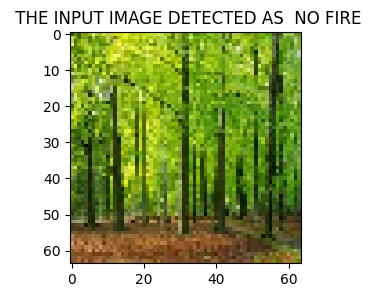

In [63]:
from tensorflow.keras.preprocessing import image
img_path ='/Users/mehakpreetsingh/Downloads/images-2.jpeg'
input_image = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(input_image) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction_img = CNN.predict(img_array)

print(f'THE PREDICTION OF INPUT IMAGE IS {prediction_img}')

plt.figure(figsize=(10,3))
if prediction_img >0.5:
       OUTPUT_NFIRE=  ' THE INPUT IMAGE DETECTED AS  NO FIRE'
       
       
       
       plt.imshow(input_image)
       plt.title(OUTPUT_NFIRE)
    
    
elif prediction_img<0.5:
     
     OUTPUT_FIRE=  'THE INPUT IMAGE DETECTED AS  WILD FIRE'
     plt.imshow(input_image)
     plt.title(OUTPUT_FIRE)



#                            MAKING OF VGG16 MODEL FOR  IMAGE RECOGINATION

In [28]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

base_model=VGG16(include_top=False,input_shape=(64,64,3),weights='imagenet')

for layers in base_model.layers:
    layers.trainable=False


x=Flatten()(base_model.output)
x=Dense(units=128,activation='relu')(x)
x=Dense(units=1,activation='sigmoid')(x)


model_vgg16=Model(inputs=base_model.inputs,outputs=x)


#### Compling our VGG16 MODEL

In [29]:
model_vgg16.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history =model_vgg16.fit(x=train_data_set,validation_data=test_data_set,batch_size=32,epochs=20)

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_56']
Received: inputs=Tensor(shape=(None, 64, 64, 3))
  warnings.warn(msg)


58/58 ━━━━━━━━━━━━━━━━━━━━ 17s 289ms/step - accuracy: 0.8391 - loss: 0.3476 - val_accuracy: 0.9265 - val_loss: 0.2096
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 17s 290ms/step - accuracy: 0.9665 - loss: 0.1013 - val_accuracy: 0.8971 - val_loss: 0.2403
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 314ms/step - accuracy: 0.9693 - loss: 0.0909 - val_accuracy: 0.9118 - val_loss: 0.2326
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 327ms/step - accuracy: 0.9886 - loss: 0.0609 - val_accuracy: 0.9412 - val_loss: 0.1875
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 330ms/step - accuracy: 0.9792 - loss: 0.0602 - val_accuracy: 0.8971 - val_loss: 0.2539
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 323ms/step - accuracy: 0.9737 - loss: 0.0699 - val_accuracy: 0.9265 - val_loss: 0.1945
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 334ms/step - accuracy: 0.9885 - loss: 0.0441 - val_accuracy: 0.9559 - val_loss: 0.1933
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 351ms/step - accuracy: 0.9883 - loss: 0.0395 - val_accuracy: 0.926

#### Acuuracy of  VGG16 MODEL

#### Accuracy for VGG16

In [30]:
Loss, Accuracy_VGG16=model_vgg16.evaluate(test_data_set)
print(f'THE ACCURACY OF VGG16 MODEL IS {Accuracy_VGG16*100:.2f}%')

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.9281 - loss: 0.2545
THE ACCURACY OF VGG16 MODEL IS 92.65%


#### Graph of Loss vs epochs

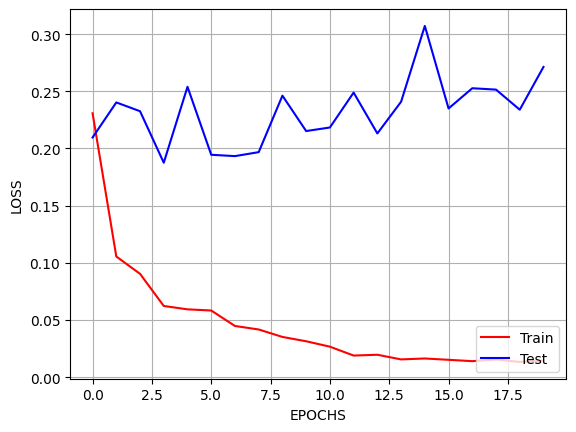

In [31]:
plt.plot(history.history['loss'],label='Train',color='red')
plt.plot(history.history['val_loss'],label='Test',color='blue')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend(loc='lower right')
plt.grid(True)

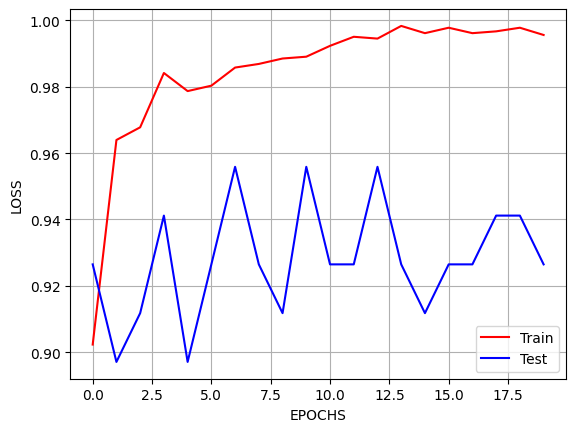

In [32]:
plt.plot(history.history['accuracy'],label='Train',color='red')
plt.plot(history.history['val_accuracy'],label='Test',color='blue')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend(loc='lower right')
plt.grid(True)

#### Taking 1st Prediction from VGG16 MODEL

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
THE PREDICTION OF INPUT IMAGE IS [[0.99969625]]


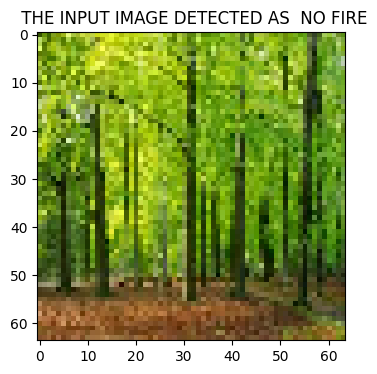

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

input_image_vgg16 = image.load_img('/Users/mehakpreetsingh/Downloads/images-2.jpeg',target_size=(64,64,3))
arr_img=image.img_to_array(input_image_vgg16)
arr_img=arr_img/255.0

imag_dimx=np.expand_dims(arr_img,axis=0)



predict_img = model_vgg16.predict(imag_dimx)
print(f'THE PREDICTION OF INPUT IMAGE IS {predict_img}')



plt.figure(figsize=(10,4))
if predict_img>0.5:
       OUTPUT_NFIRE=  ' THE INPUT IMAGE DETECTED AS  NO FIRE'
       
       
       
       plt.imshow(input_image_vgg16)
       plt.title(OUTPUT_NFIRE)
    
    
elif predict_img<0.5:
     
     OUTPUT_FIRE=  'THE INPUT IMAGE DETECTED AS  WILD FIRE'
     plt.imshow(input_image_vgg16)
     plt.title(OUTPUT_FIRE)


#### Taking 2nd Prediction from VGG16 MODEL

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
THE PREDICTION OF INPUT IMAGE IS 0.033043958246707916


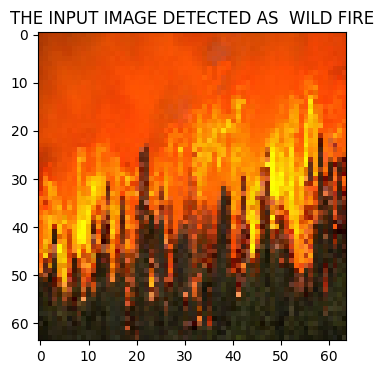

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load and preprocess image
input_image_vgg16 = image.load_img('/Users/mehakpreetsingh/Downloads/EIN-23-CS-fire-400.jpg',target_size=(64,64))
arr_img=image.img_to_array(input_image_vgg16)
arr_img=arr_img/255.0

imag_dimx=np.expand_dims(arr_img,axis=0)



predict_img = model_vgg16.predict(imag_dimx)[0][0] 
print(f'THE PREDICTION OF INPUT IMAGE IS {predict_img}')


plt.figure(figsize=(10,4))


if predict_img >0.5:
       OUTPUT_NFIRE=  ' THE INPUT IMAGE DETECTED AS  NO FIRE'
       
       
       
       plt.imshow(input_image_vgg16)
       plt.title(OUTPUT_NFIRE)
    
    
elif predict_img<0.5:
     
     OUTPUT_FIRE=  'THE INPUT IMAGE DETECTED AS  WILD FIRE'
     plt.imshow(input_image_vgg16)
     plt.title(OUTPUT_FIRE)


#### COMPARING BOTH MODEL ACCURACY

In [35]:
import pandas as pd

comp_df=pd.DataFrame({'Model':['Convonutinal Neraul Network','VGG16' ] ,
                        'Accuracy_score':[Accuracy_cnn*100,Accuracy_VGG16*100]})


comp_df.sort_values(by='Accuracy_score',ascending=False)

,Model,Accuracy_score
0,Convonutinal Neraul Network,95.588237
1,VGG16,92.647058


In [55]:
import joblib

# Assume 'model' is your trained scikit-learn model
joblib.dump(CNN, "best_model.pkl")

print("Model saved as model.joblib")


Model saved as model.joblib
